## Computer Vision: Convolutions and Filters 

Let's first implement the two-dimensional [cross-correlation operation](https://d2l.ai/chapter_convolutional-neural-networks/conv-layer.html#the-cross-correlation-operator), that takes the kernel window K positioned at the top-left corner of the image input array X and slides it across the image input array, both from left to right and top to bottom. 

In [1]:
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: MIT-0

from mxnet import np, npx
npx.set_np()
import matplotlib.pyplot as plt

# Saved in the d2l package for later use
def corr2d(X, K):
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

### 1. Very simple edge detection filtering

Let's now look at a simple application of the 2-d cross-correlation operation to detect (vertical) edges of an object in an image by finding the location of the pixel change. 

First, we construct an ‘image’ of 6×8 pixels. 

In [2]:
X = np.ones((6, 8))
X[:, 2:6] = 0

The middle four columns are black/dark (0) and the rest are white/light (1), as seen below:

In [3]:
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


Let's plot it as an image.

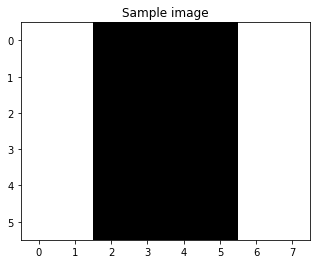

In [4]:
plt.title("Sample image")
plt.imshow(X.asnumpy(), cmap=plt.cm.bone);

#### 1.2 Simple vertical edge detection filter

We can construct a very simple *vertical* edge filter by using a kernel K = [1, -1], with a height of 1 and width of 2. When we perform the cross-correlation operation with the input, if the horizontally adjacent elements are the same, the output is 0. Otherwise, the output is non-zero.

In [5]:
K = np.array([[1, -1]])

Let's perform the 2D cross-correlation with our image X with this kernel K, and examine the result. 

In [6]:
X_K = corr2d(X, K)

In [7]:
print(X_K.asnumpy())

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


We detected 1 for the edge from white to black and -1 for the edge from black to white. The rest of the outputs are 0, as also shown with gray color below.

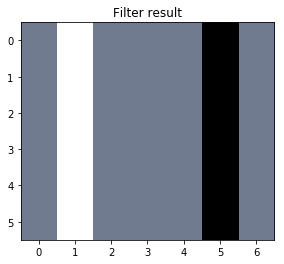

In [8]:
plt.title("Filter result")
plt.imshow(X_K.asnumpy(), cmap=plt.cm.bone);

#### 1.2 Simple horizontal edge detection filter

However, we can also construct a very simple *horizontal* edge detection filter, that will find the horizontal edges of the transposed image.

In [9]:
K_horizontal_edges = np.array([[1], [-1]])

We will use the transposed version of our image. It looks like this:

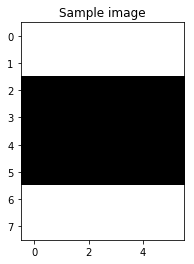

In [10]:
plt.title("Sample image")
plt.imshow(X.T.asnumpy(), cmap=plt.cm.bone);

In [11]:
XT_K_horizontal_edges = corr2d(X.T, K_horizontal_edges)

In [12]:
print(XT_K_horizontal_edges)

[[ 0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [-1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.]]


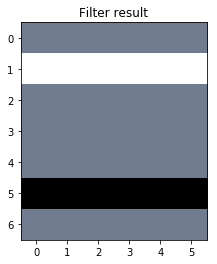

In [13]:
plt.title("Filter result")
plt.imshow(XT_K_horizontal_edges.asnumpy(), cmap=plt.cm.bone);

### 2. More Filters

#### 2.1 Image Preprocessing

Taking an image as input, converting it to GrayScale, and padding to avoid sizing issues when filtering. 

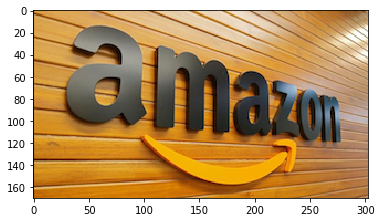

In [14]:
# Load an image
from PIL import Image
input_image = Image.open("../../DATA/CV/EMBK-NLP-AMAZON-IMG.png")

# Show the original image 
plt.imshow(input_image);

To convert the above image to gray scale, we need to know the RGB weights to creat a gray image:

    Gray = 0.299 R + 0.587 G + 0.114 B

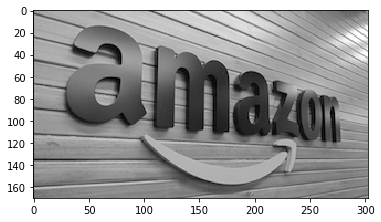

In [15]:
# Creating an array from image data
image_np = np.array(input_image)
image_grayscale = image_np[:, :, 0] * 0.299 + image_np[:, :, 1] * 0.587 + image_np[:, :, 2] * 0.114

# Show the preprocessed image
plt.imshow(image_grayscale.asnumpy(), cmap=plt.get_cmap('gray'));

#### 2.2 Edge Detection: Prewitt Filters

Let us build a [prewitt filter](https://en.wikipedia.org/wiki/Prewitt_operator). Notice that the following lines takes a minute or two to run.

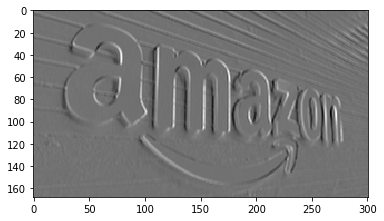

In [16]:
# Prewitt filter 3x3
Prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1],[-1, 0, 1]])
Prewitt_y = np.array([[1, 1, 1], [0, 0, 0],[-1, -1, -1]])

image_Prewitt_x = corr2d(image_grayscale, Prewitt_x)
plt.imshow(image_Prewitt_x.asnumpy(), cmap=plt.get_cmap('gray'));

## You can run below to see more
# image_Prewitt_y = corr2d(image_grayscale, Prewitt_y)
# plt.imshow(image_Prewitt_y.asnumpy(), cmap=plt.get_cmap('gray'));

# image_Prewitt = corr2d(image_Prewitt_x, Prewitt_y)
# plt.imshow(image_Prewitt.asnumpy(), cmap=plt.get_cmap('gray'));

#### 2.3 Edge Detection: Sobel Filters

[Sobel filter](https://en.wikipedia.org/wiki/Sobel_operator) also called the *Sobel–Feldman operator* , which is used for edge detection. Let's create a Sobel filter!

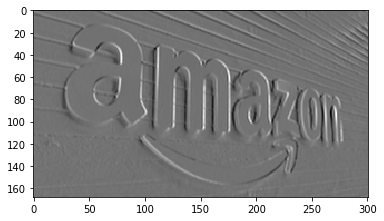

In [17]:
# Sobel filter 3x3
Sobel_x = np.array([[-1, 0, 1], [-2, 0, 2],[-1, 0, 1]])
Sobel_y = np.array([[1, 2, 1], [0, 0, 0],[-1, -2, -1]])

image_Sobel_x = corr2d(image_grayscale, Sobel_x)
plt.imshow(image_Sobel_x.asnumpy(), cmap=plt.get_cmap('gray'));

## You can run below to see more
# image_Sobel_y = corr2d(image_grayscale, Sobel_y)
# plt.imshow(image_Sobel_y, cmap=plt.get_cmap('gray'))
# plt.show()

### 3. Smoothing Gaussian Filter

Let's also create a [Gaussian filter](https://en.wikipedia.org/wiki/Gaussian_filter) in action. When we apply a Gaussian filter to an image, we should see a smoothing effect.

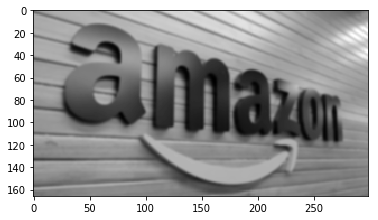

In [18]:
# Gaussian filter 5x5
gauss = np.array([[1, 4, 7, 4, 1], [4, 16, 26, 16, 4], [7, 26, 41, 26, 7], [4, 16, 26, 16, 4], [1, 4, 7, 4, 1]])

image_Gauss = corr2d(image_grayscale, gauss)
plt.imshow(image_Gauss.asnumpy(), cmap=plt.get_cmap('gray'));